# Support Vector Machine
- This notebook contains the code to implement the Support Vector Machine algorithm from scratch using `Gradient Descent`

## Importing Libraries

In [9]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler

# dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Custom Class

In [41]:
class SVM:

  def __init__(self,
               C=1.0,
               eta=1.0,
               eta_d=50,
               tol=1e-4,
               n_epochs=100,
               random_state=None):
    """
    Parameters:
    -----------

    C: float
       Controls the regularization strength

    eta: float
         Used in the learning rate for gradient descent

    eta_d: int
           Used in learning schedule for updating the learning rate for gradient descent

    tol: float
         For checking convergence of gradient descent

    n_epochs: int
              The no. of times to iterate over the entire dataset for gradient descent

    random_state: int
                  For controlling the randomness and reproducibility of results across multiple runs
    """
    self.C = C
    self.eta = eta
    self.eta_d = eta_d
    self.tol = tol
    self.n_epochs = n_epochs
    self.random_state = random_state


  def _activation(self, A):
    return np.dot(A, self.w_) + self.b_


  def _learning_schedule(self, i):
    return self.eta / (self.eta_d + i)


  def _display_training(self):
    # this function plots the result of gradient descent
    x_range = np.arange(1, len(self.costs_) + 1)
    plt.figure(figsize=(6, 4))
    plt.plot(x_range,
             self.costs_,
             linewidth=2)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cost")
    plt.title("Gradient Descent")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  def fit(self, X, y):
    """
    this function will train an SVM classifier model
    """

    if self.random_state:
      np.random.seed(self.random_state)

    n = X.shape[0]
    self.n_features_in_ = X.shape[1]
    self.b_ = np.random.rand()
    self.w_ = np.random.rand(self.n_features_in_)
    self.costs_ = []

    prev_J = np.inf
    y = np.where(y == 1, 1, -1)
    for i in range(self.n_epochs):
      # identifying the support vectors
      z = self._activation(X)
      support_vectors = (y * z) < 1
      X_sv = X[support_vectors]
      y_sv = y[support_vectors]
      z_sv = self._activation(X_sv)
      t_sv = y_sv * z_sv

      # computing the cost and checking convergence
      J = (np.dot(self.w_, self.w_) / 2) + self.C * (1 - t_sv).mean()
      if np.abs(prev_J - J) <= self.tol:
        print(f"> The algorithm converged in {i + 1} iterations")
        break
      prev_J = J
      self.costs_.append(J)

      # computing gradients
      dJ_dw = self.w_ - (self.C * (X_sv * y_sv.reshape(-1, 1)).mean(axis=0))
      dJ_db = -self.C * y_sv.mean()

      # updating weights
      alpha = self._learning_schedule(i + 1)
      self.w_ -= (alpha * dJ_dw)
      self.b_ -= (alpha * dJ_db)

    z = self._activation(X)
    support_vectors = (y * z) < 1
    self.support_vectors_ = X[support_vectors]

    if i == self.n_epochs - 1:
      print(f"> The algorithm ran all {self.n_epochs} iterations")
    print("> Successfully trained the SVM model!\n")

    return self


  def predict(self, X):
    z = self._activation(X)
    return np.where(z >= 0, 1, 0)


  def score(self, X, y):
    # this function will return the accuracy of the model
    y_pred = self.predict(X)
    return (y == y_pred).mean()

## Getting the Data

In [42]:
X, y = load_iris(return_X_y=True)
y = np.where(y == 0, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## Scaling the Data

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Model

In [44]:
svm = SVM(n_epochs=500)
svm.fit(X_train_scaled, y_train)

> The algorithm converged in 84 iterations
> Successfully trained the SVM model!



In [45]:
svm.w_

array([-0.3082344 ,  0.53970488, -0.22597888, -0.34276259])

In [46]:
svm.b_

-0.1630662516377692

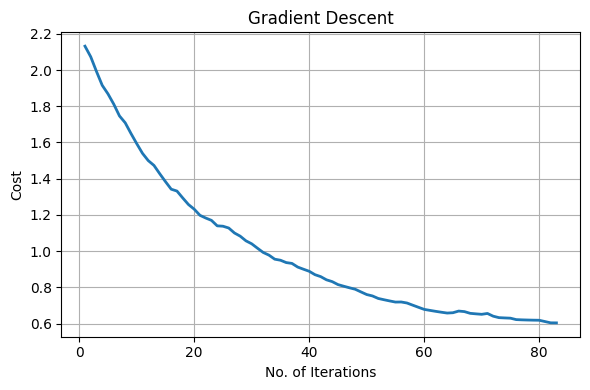

In [47]:
svm._display_training()

In [48]:
svm.predict(X_test_scaled)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
np.c_[y_test, svm.predict(X_test_scaled)]

## Evaluating the Model

In [49]:
svm.score(X_train_scaled, y_train)

1.0

In [51]:
svm.score(X_test_scaled, y_test)

1.0